<a href="https://colab.research.google.com/github/anish170805/ML-Algos/blob/main/HierarchialClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Agglomerative

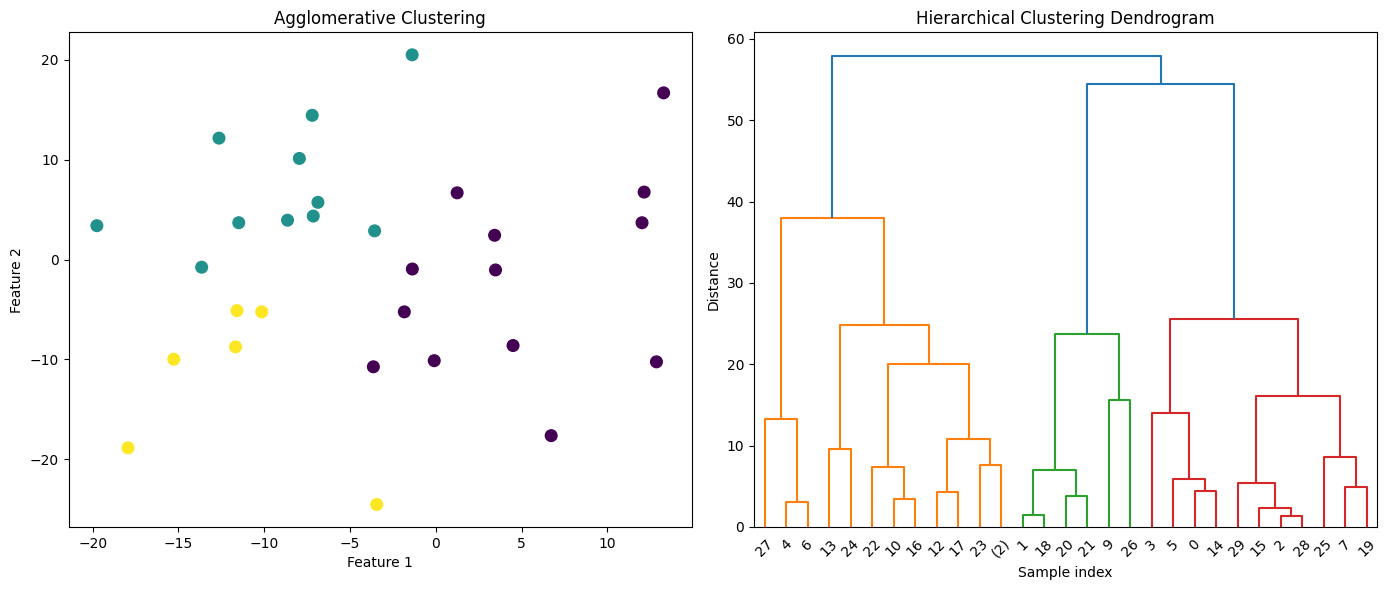

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=10, random_state=42)

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()

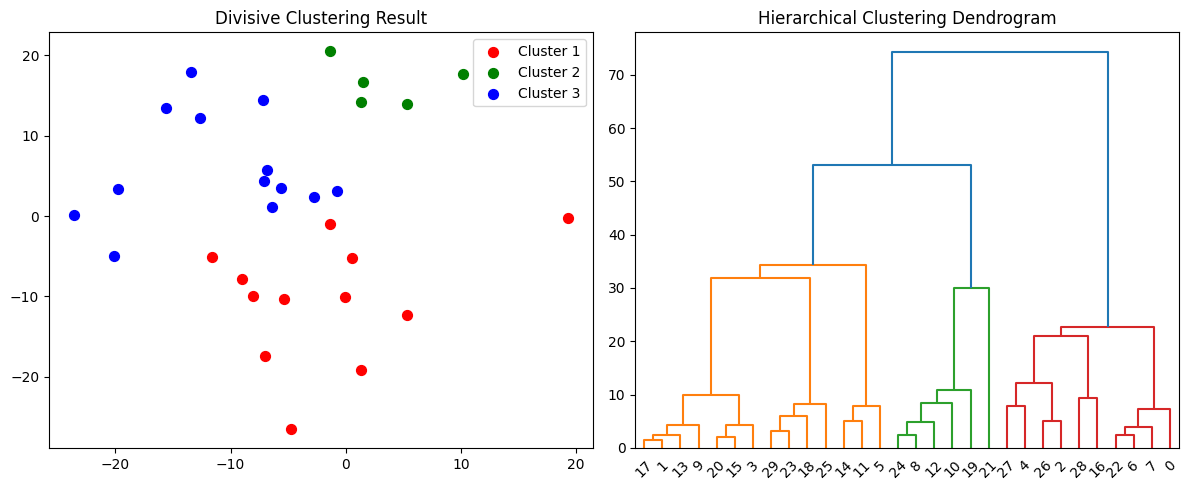

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

X, _ = make_blobs(n_samples=30, centers=5, cluster_std=10, random_state=42)


def divisive_clustering(data, max_clusters=3):
    clusters = [data]  # Initialize clusters with the entire dataset
    while len(clusters) < max_clusters:
        cluster_to_split = max(clusters, key=lambda x: len(x))
        clusters.remove(cluster_to_split)

        kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(cluster_to_split) # n_init='auto' to silence warning
        cluster1 = cluster_to_split[kmeans.labels_ == 0]
        cluster2 = cluster_to_split[kmeans.labels_ == 1]

        clusters.extend([cluster1, cluster2])
    return clusters


clusters = divisive_clustering(X, max_clusters=3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50,
                c=colors[i], label=f'Cluster {i+1}')
plt.title('Divisive Clustering Result')
plt.legend()

linked = linkage(X, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked, orientation='top',
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()

### Applying it on  dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CC-GENERAL.csv')

data.drop('CUST_ID', axis=1, inplace=True)

data.fillna(method='ffill', inplace=True)

data.head()

/tmp/ipython-input-2479392721.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

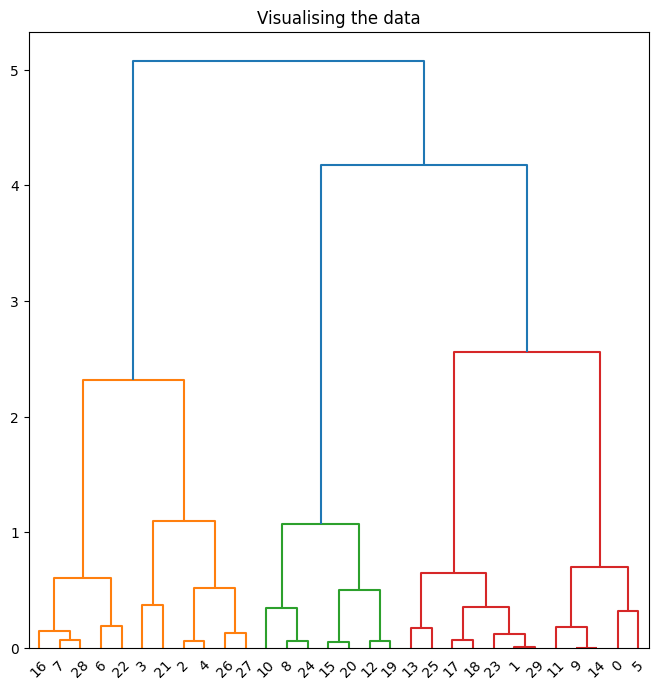

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

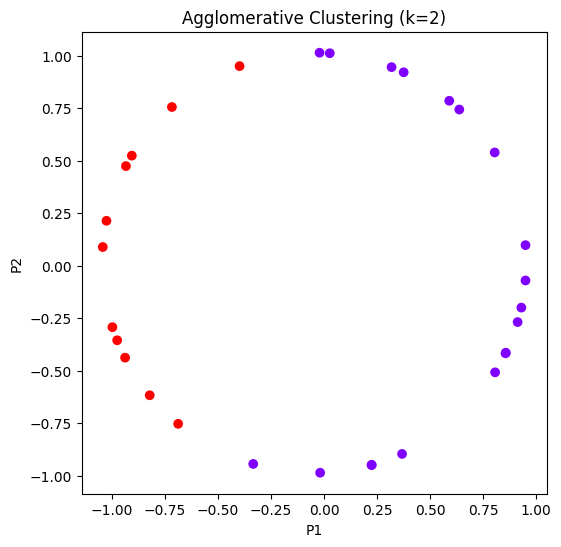

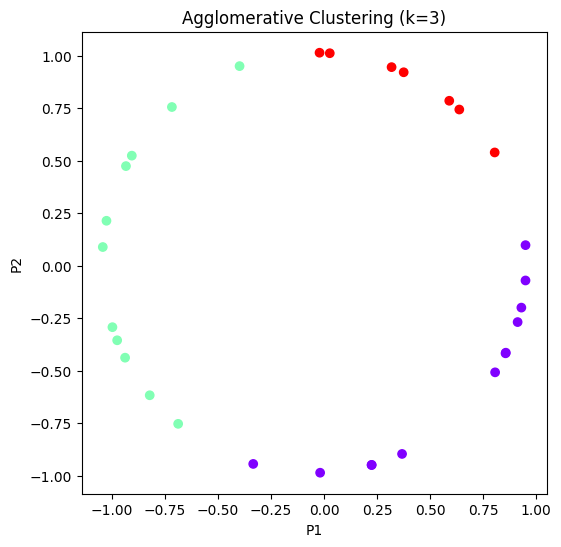

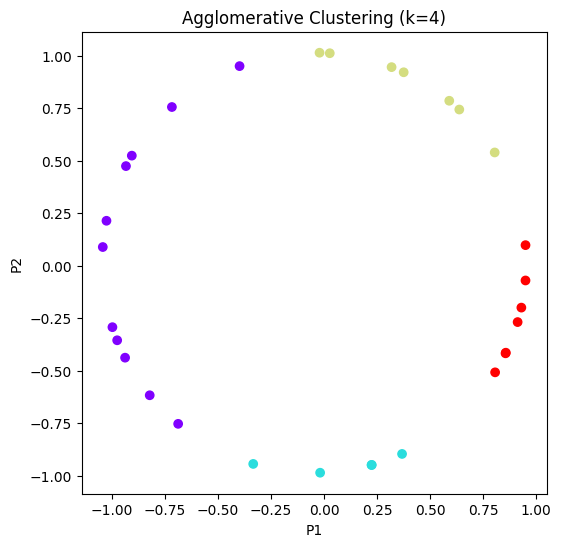

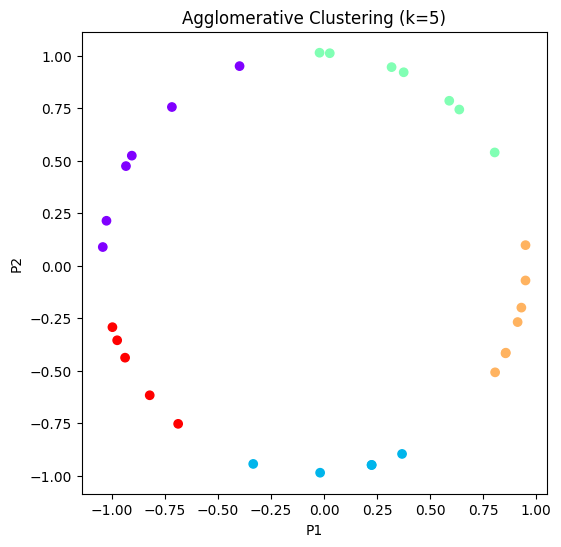

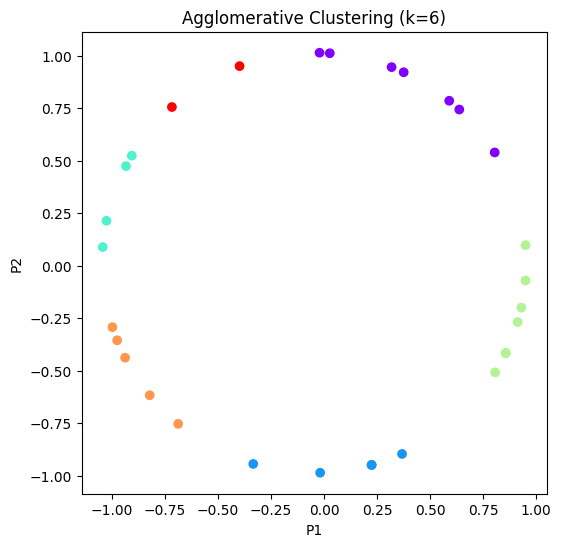

In [ ]:
for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_principal)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering (k={k})')
    plt.xlabel('P1')
    plt.ylabel('P2')
    plt.show()